# EDA - project. Let's make happy customers
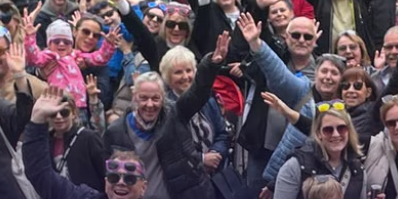


Before we start, lets get some libraries in place

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno # get more insights about missing data

from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1. Load the data into Panda's DataFrame 

In [2]:
#df = pd.read_csv('data/King_County_House_prices_dataset.csv')
df = pd.read_csv('data/King_clean.csv')    # use this one for skipping all the cleaning steps

## 2. Now let's have a deeper look at the data and get some first insights

In [3]:
# lets have a look at this data
df.head()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


.. and let's examine the descriptive statistics of the dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

here are some first insights
* we can do some modifications on date --> convert to date type. 
* lots of missing data on waterfront. Not relevant for my client. 
* some data missing on sqft_basement
* lots of data missing in yr_renovated
* features date, waterfront, view, condition, grade, zipcode categorical (partly numerical category)

In [5]:
df.describe()

,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,540296.574,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284
std,367368.140,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442
min,78000.000,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,322000.000,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000


...and more insights : 
* on average, houses are quite old
* with a medium price of 500.000$ 
* average condition of 3,4 from 5 (very good)

## 3. Clean up the data

Dealing with missing values: remove (rows, or columns) or impute data

Dealing with extreme values or outliers: remove data

Transform data where necessary, e.g. to log or sqrt to try to get some feature closer to normal distribution, or binning

How much data did you throw away? 😅

### a) Tell our data frame to only use lower cases for our column names

In [6]:
# changing all column names to lower case
df.columns = df.columns.str.lower()
df.columns

Index(['date', 'price', 'house_id', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### b) check for duplicates  .. there are none! good :)

In [7]:
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

### c) check date type and change it

In [8]:
type(df['date'][0]) # check for type of date --> str!

str

In [9]:
# change "date" dtype to datetime with format %Y/%m/%d
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [10]:
type(df['date'][0]) # check for type again --> Timestamp 

pandas._libs.tslibs.timestamps.Timestamp

### d) Check Data types

Price : 3 decimal places. No decimal needed for price. Int would be fine. Will convert to int


In [11]:
# change data type to int
df = df.astype({'price': int})
# same for sqft values . Basement needs cleaning first.. 
df = df.astype({'sqft_living': int, 'sqft_lot': int, 'sqft_above': int, 'sqft_living15': int, 'sqft_lot15': int})
df

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,7129300520,3.000,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,2014-12-09,538000,6414100192,3.000,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.000,1951,19910.000,98125,47.721,-122.319,1690,7639
2,2015-02-25,180000,5631500400,2.000,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.000,1933,NaN,98028,47.738,-122.233,2720,8062
3,2014-12-09,604000,2487200875,4.000,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,2015-02-18,510000,1954400510,3.000,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000,263000018,3.000,2.500,1530,1131,3.000,0.000,0.000,...,8,1530,0.000,2009,0.000,98103,47.699,-122.346,1530,1509
21593,2015-02-23,400000,6600060120,4.000,2.500,2310,5813,2.000,0.000,0.000,...,8,2310,0.000,2014,0.000,98146,47.511,-122.362,1830,7200
21594,2014-06-23,402101,1523300141,2.000,0.750,1020,1350,2.000,0.000,0.000,...,7,1020,0.000,2009,0.000,98144,47.594,-122.299,1020,2007
21595,2015-01-16,400000,291310100,3.000,2.500,1600,2388,2.000,NaN,0.000,...,8,1600,0.000,2004,0.000,98027,47.535,-122.069,1410,1287


### 3.1 Ok, lets look at the basement squarefoots. Seems there is a formula that we can use for the missing values: 

sqft_basement = sqft_living - sqft_above

In [12]:
# it seems that the basement value normally is 
# the value of (sqft_living - sqft_above), so 
# we are using this formula for the NaN values

df['sqft_basement'] = df['sqft_basement'].fillna(
    df['sqft_living'] - df['sqft_above']
)

In [13]:
df.sqft_basement.isna().sum()

np.int64(0)

### 3.2 Lets look at the houses with yr_renovated = NaN

In [14]:
# houses younger than 15 years normally do not need to be renovated
df.query('yr_renovated.isna() == True and yr_built > 2001')

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
45,2014-07-18,488000,8035350320,3.000,2.500,3160,13603,2.000,0.000,0.000,...,8,3160,0.000,2003,NaN,98019,47.744,-121.977,3050,9232
56,2014-08-19,292500,9478500640,4.000,2.500,2250,4495,2.000,0.000,0.000,...,7,2250,0.000,2008,NaN,98042,47.366,-122.114,2250,4500
73,2014-07-10,360000,5416510140,4.000,2.500,2380,5000,2.000,0.000,0.000,...,8,2380,0.000,2005,NaN,98038,47.361,-122.036,2420,5000
89,2014-09-04,335000,3869900162,2.000,1.750,1030,1066,2.000,0.000,0.000,...,7,765,265.000,2006,NaN,98136,47.539,-122.387,1030,1106
139,2014-05-07,519950,2767603505,3.000,2.250,1170,1249,3.000,0.000,0.000,...,8,1170,0.000,2014,NaN,98107,47.672,-122.381,1350,1310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21576,2015-04-16,475000,1931300412,3.000,2.250,1190,1200,3.000,0.000,0.000,...,8,1190,0.000,2008,NaN,98103,47.654,-122.346,1180,1224
21577,2015-03-17,1090000,8672200110,5.000,3.750,4170,8142,2.000,0.000,2.000,...,10,4170,0.000,2006,NaN,98056,47.535,-122.181,3030,7980
21579,2014-10-31,520000,1972201967,2.000,2.250,1530,981,3.000,0.000,0.000,...,8,1480,50.000,2006,NaN,98103,47.653,-122.346,1530,1282
21581,2015-04-21,1580000,191100405,4.000,3.250,3410,10125,2.000,0.000,0.000,...,10,3410,0.000,2007,NaN,98040,47.565,-122.223,2290,10125


lets look at the yr_renovated. This looks strange, seems there is one digit too much.
2015 is shown as 20150. So lets divide by 10 here..., but first check the unique values


In [15]:
df.yr_renovated.unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

In [16]:
df.yr_renovated = df.yr_renovated / 10 

In [17]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

now we need to take care of the NaN numbers
1) set all NaN values for houses that are built after 2000 to 0 --> not been renovated (within 15 yrs normally not necessary)

In [18]:
df.query('yr_built > 2000')['yr_renovated'].isna().sum()

np.int64(803)

so we do have 803 missing values for yr_renovated where yr_built > 2000. Lets set those ones to 0 that have yr_built >2000

In [19]:
# 1. Define a boolean mask for the condition
condition = (df['yr_built'] > 2000) & (df['yr_renovated'].isna())

# 2. Use .loc[] to select the rows that meet the condition
#    and the specific column, then set the values to 0
df.loc[condition, 'yr_renovated'] = 0

In [20]:
#lets check again
df.query('yr_built > 2000')['yr_renovated'].isna().sum()

np.int64(0)

Let's have a look at the other ones 

In [21]:
df.head(5)

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,7129300520,3.000,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.000,1955,0.000,98178,47.511,-122.257,1340,5650
1,2014-12-09,538000,6414100192,3.000,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.000,1951,1991.000,98125,47.721,-122.319,1690,7639
2,2015-02-25,180000,5631500400,2.000,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.000,1933,NaN,98028,47.738,-122.233,2720,8062
3,2014-12-09,604000,2487200875,4.000,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.000,1965,0.000,98136,47.521,-122.393,1360,5000
4,2015-02-18,510000,1954400510,3.000,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.000,1987,0.000,98074,47.617,-122.045,1800,7503


In [22]:
# lets check the condition values --> go from 1 (poor?) to 5 excellent
df.condition.unique()

array([3, 5, 4, 1, 2])

Lets check median conditions for renovated houses (renovated within last 30 years) and unrenovated houses (renovated before 1985)

In [23]:
df.query('yr_renovated > 1985')['condition'].describe()

count   581.000
mean      3.133
std       0.417
min       1.000
25%       3.000
50%       3.000
75%       3.000
max       5.000
Name: condition, dtype: float64

Renovated houses after 1985 have a median condition of 3.0, mean is 3.13 with a standard deviation of 0,42. 

In [24]:
df.query('yr_renovated < 1985')['condition'].describe()

count   17957.000
mean        3.402
std         0.647
min         1.000
25%         3.000
50%         3.000
75%         4.000
max         5.000
Name: condition, dtype: float64

In [25]:
df.query('yr_renovated == 0')['condition'].describe()

count   17808.000
mean        3.401
std         0.647
min         1.000
25%         3.000
50%         3.000
75%         4.000
max         5.000
Name: condition, dtype: float64

Not renovated houses (yr_renovated = 0) (or renovated before 1985) have a condition of 3.4 with std of 0.65

Lets look at newer renovated houses, after 2000

In [27]:
df.query('yr_renovated > 2000')['condition'].describe()

count   350.000
mean      3.057
std       0.277
min       3.000
25%       3.000
50%       3.000
75%       3.000
max       5.000
Name: condition, dtype: float64

They still have a mean of 3.0. There is not much value in the condition for getting information about the renovation status. 

At least we get more information about condition :  3 is better than 3.5 --> condition 1 is best, condition 5 is worst. 

Lets have a look at <b>grade</b> of the houses... 

In [28]:
df.query('yr_renovated > 2010')['grade'].describe()

count   135.000
mean      7.578
std       0.958
min       5.000
25%       7.000
50%       7.000
75%       8.000
max      10.000
Name: grade, dtype: float64

In [29]:
df.query('yr_renovated > 2000')['grade'].describe()

count   350.000
mean      7.951
std       1.185
min       5.000
25%       7.000
50%       8.000
75%       9.000
max      13.000
Name: grade, dtype: float64

In [30]:
df.query('yr_renovated < 2000')['grade'].describe()

count   18173.000
mean        7.686
std         1.175
min         3.000
25%         7.000
50%         7.000
75%         8.000
max        13.000
Name: grade, dtype: float64

In [31]:
df.query('yr_renovated.isna()')['grade'].describe()

count   3045.000
mean       7.451
std        1.136
min        4.000
25%        7.000
50%        7.000
75%        8.000
max       13.000
Name: grade, dtype: float64

In [32]:
df.query('yr_renovated.isna()')['condition'].describe()

count   3045.000
mean       3.509
std        0.686
min        1.000
25%        3.000
50%        3.000
75%        4.000
max        5.000
Name: condition, dtype: float64

Again, not a very good measure for renovations. Grade is worse for houses renovated after 2000 (could have been very necessary..)

At this point I will set all yr_renovated with NaN to 0, since that would be the next best assumption. 


In [33]:
#set remaining NaN also to 0 for yr_renovated
df['yr_renovated'] = df['yr_renovated'].fillna(0)

.. and also set the type to int now, since we only have years in there and 0. 

In [34]:
# make waterfront an INT
df = df.astype({'yr_renovated': int})

### 3.3 So lets look at waterfront data now.. 

<Axes: >

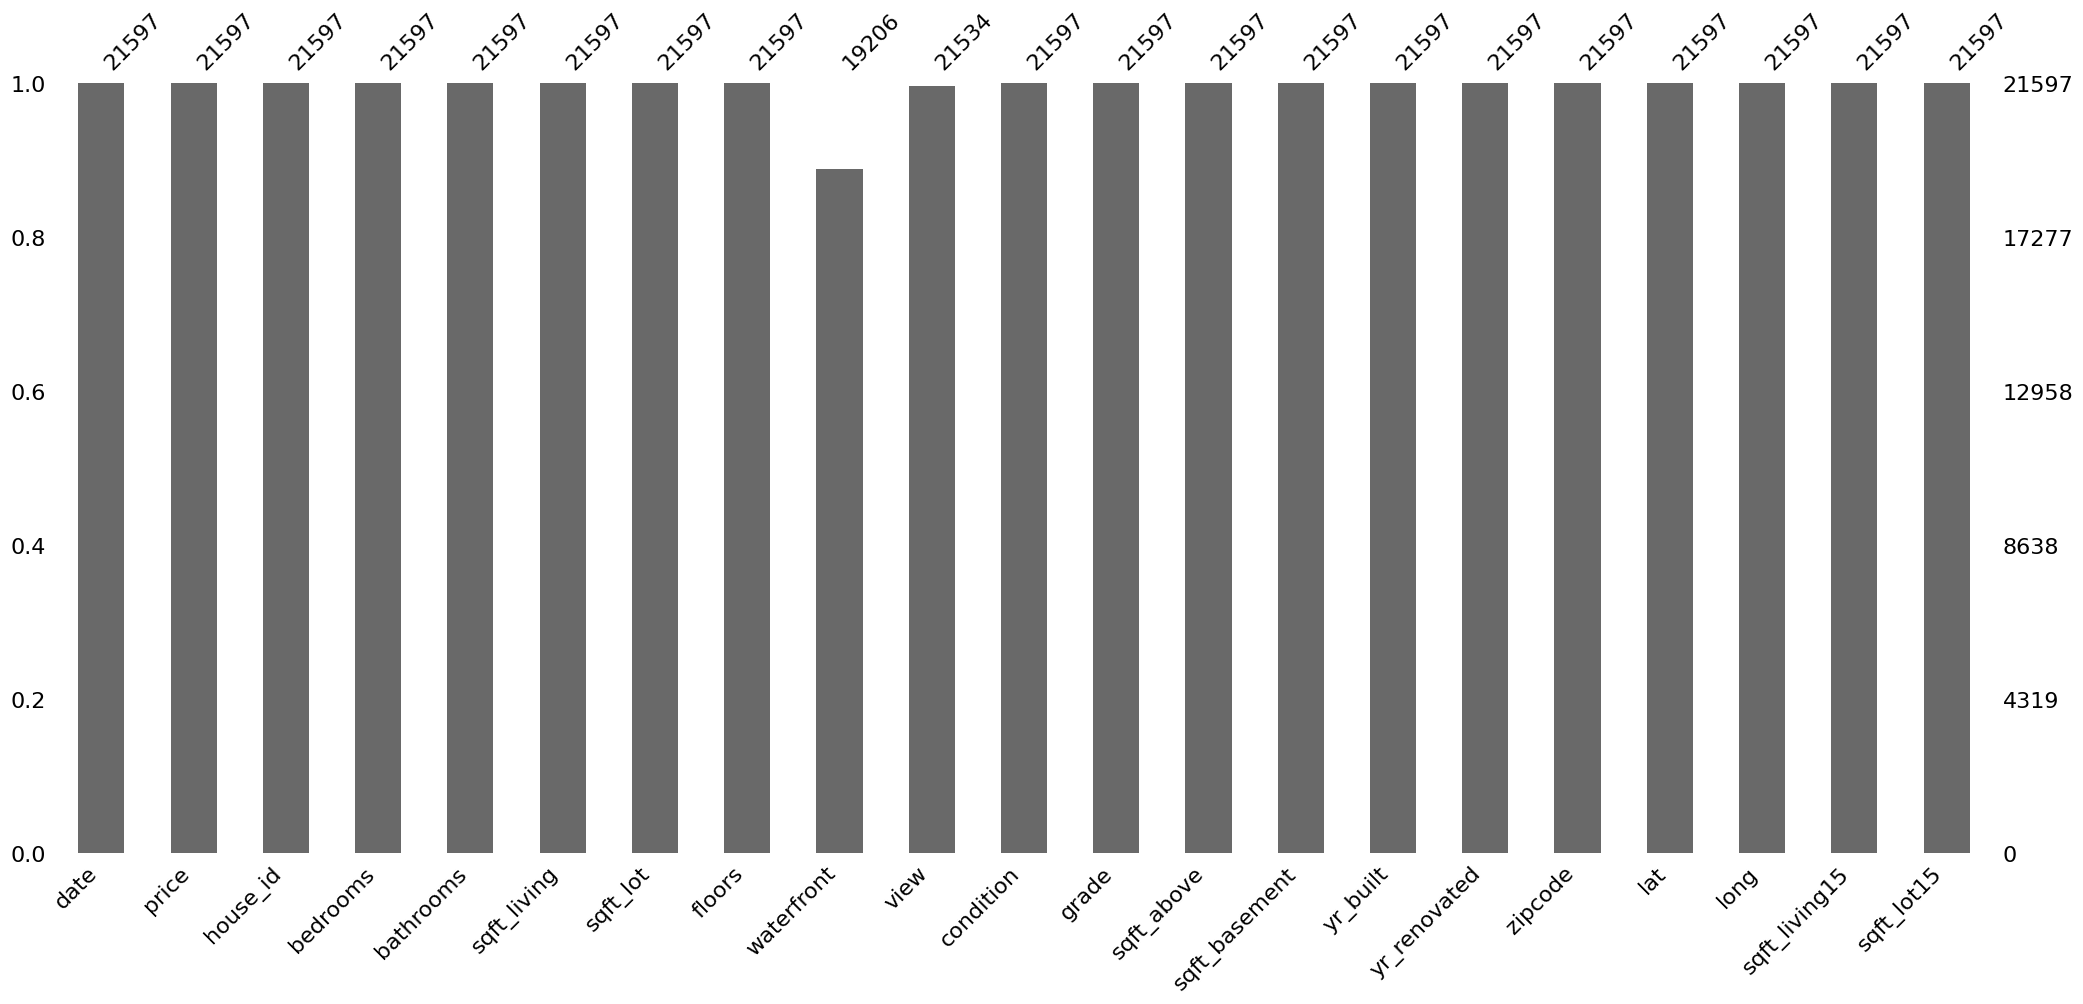

In [35]:
# plotting percentage of missing values per column
msno.bar(df)

<Axes: >

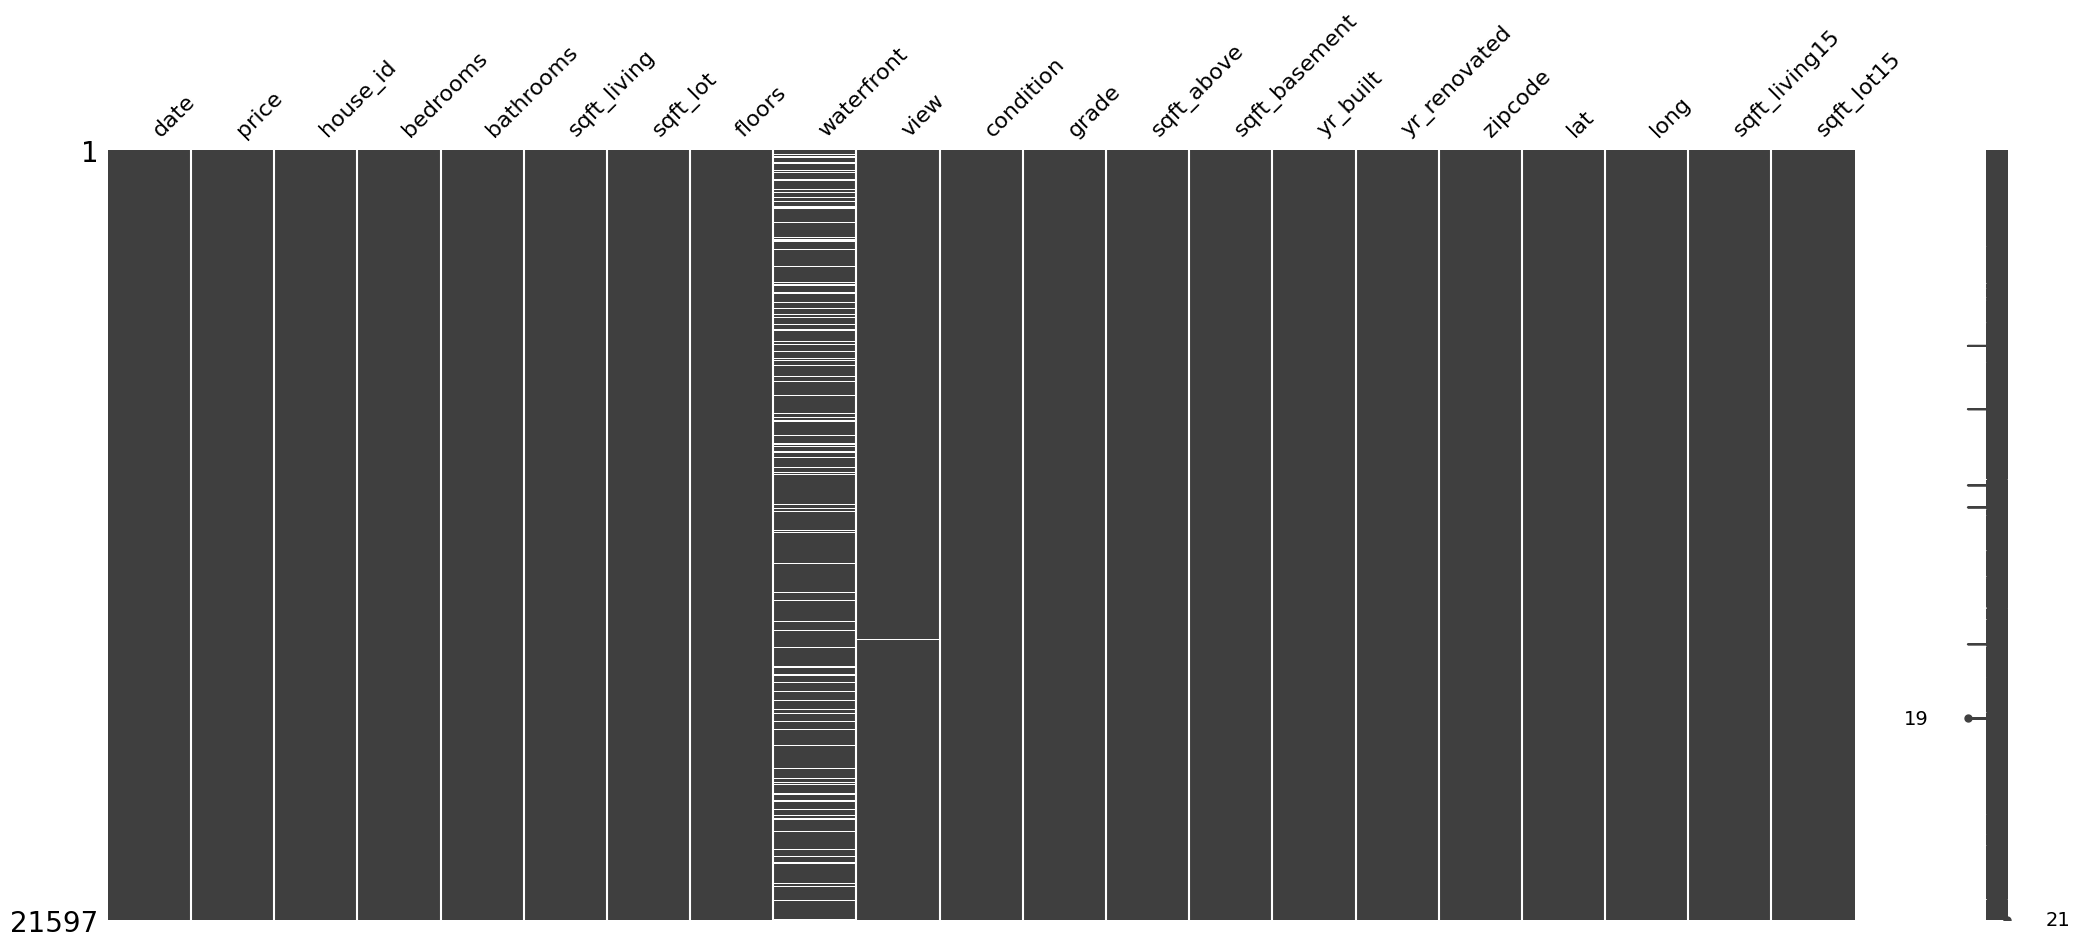

In [36]:
msno.matrix(df)

We do have missing values in 
* yr_renovated, but no good idea on how to fill in those. --> DONE.  
* view - there are only some, we can maybe get that by looking at the area and the price/sqft --> make an analysis
* waterfront. There could (should) be a correlation with price/sqft and with the view. It for sure has to do with the ZIP code. 


let's have a look at view values for waterfront houses

In [37]:
df.waterfront.unique() # so we have 1 for waterfront, 0 for not waterfront

array([nan,  0.,  1.])

In [38]:
df.query('waterfront == 1').view.describe()

count   145.000
mean      3.786
std       0.555
min       1.000
25%       4.000
50%       4.000
75%       4.000
max       4.000
Name: view, dtype: float64

--> we have a HUGE correlation with the view, with the majority of those places having a view of 4. 

In [39]:
df.query('waterfront == 0').view.describe()

count   19004.000
mean        0.204
std         0.698
min         0.000
25%         0.000
50%         0.000
75%         0.000
max         4.000
Name: view, dtype: float64

In [40]:
# lets have a look at ZIP Codes 
waterfront_zip = df.query('waterfront == 0').zipcode.unique()

In [41]:
df.query('waterfront.isna() == True')

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,7129300520,3.000,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.000,1955,0,98178,47.511,-122.257,1340,5650
10,2015-04-03,662500,1736800520,3.000,2.500,3560,9796,1.000,NaN,0.000,...,8,1860,1700.000,1965,0,98007,47.601,-122.145,2210,8925
23,2014-05-16,252700,8091400200,2.000,1.500,1070,9643,1.000,NaN,0.000,...,7,1070,0.000,1985,0,98030,47.353,-122.166,1220,8386
40,2014-07-15,625000,5547700270,4.000,2.500,2570,5520,2.000,NaN,0.000,...,9,2570,0.000,2000,0,98074,47.614,-122.027,2470,5669
55,2014-05-12,885000,9822700295,4.000,2.500,2830,5000,2.000,NaN,0.000,...,9,2830,0.000,1995,0,98105,47.660,-122.290,1950,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21578,2014-10-17,350000,5087900040,4.000,2.750,2500,5995,2.000,NaN,0.000,...,8,2500,0.000,2008,0,98042,47.375,-122.107,2530,5988
21582,2014-10-13,541800,8956200760,4.000,2.500,3118,7866,2.000,NaN,2.000,...,9,3118,0.000,2014,0,98001,47.293,-122.264,2673,6500
21586,2014-06-26,224000,844000965,3.000,1.750,1500,11968,1.000,NaN,0.000,...,6,1500,0.000,2014,0,98010,47.309,-122.002,1320,11303
21587,2014-08-25,507250,7852140040,3.000,2.500,2270,5536,2.000,NaN,0.000,...,8,2270,0.000,2003,0,98065,47.539,-121.881,2270,5731


In [42]:
df.view.unique() # lets see what view values we have...

array([ 0., nan,  3.,  4.,  2.,  1.])

So lets set waterfront to 1 if 
* ZIP  in waterfront_zip AND
* view = 4
* waterfront was NaN

In [43]:
# 1. Define a boolean mask for the condition
condition = (df['zipcode'].isin(waterfront_zip)) & (df['view'] == 4) & (df['waterfront'].isna() == True)

# 2. Use .loc[] to select the rows that meet the condition
#    and the specific column, then set the values to 0
df.loc[condition, 'waterfront'] = 1

In [44]:
# lets see how many are left... not many set...  (19206 - 2363 = ) 21597 in total, was 19206 and still 2363 left --> 28 with seafront
df.waterfront.isna().sum()

np.int64(2363)

In [45]:
# and set all other values of waterfront to 0... 
df.waterfront.fillna(0, inplace=True)

In [46]:
df.waterfront.isna().sum()

np.int64(0)

Hint : I probably have missed some waterfront places, since some of them have had a view value <4. I will be conscious about it, 
but mostly waterfront needs also great view to justify a significantly higher price. 

### 3.4 Now lets look at the view... 


In [47]:
df.query('view.isna() == True')

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2015-01-15,291850,2008000270,3.000,1.500,1060,9711,1.000,0.000,NaN,...,7,1060,0.000,1963,0,98198,47.410,-122.315,1650,9711
114,2014-10-28,480000,8961960160,4.000,2.500,3230,16171,2.000,0.000,NaN,...,9,2520,710.000,2001,0,98001,47.318,-122.253,2640,8517
129,2015-04-06,430000,7853210060,4.000,2.500,2070,4310,2.000,0.000,NaN,...,7,2070,0.000,2004,0,98065,47.532,-121.850,1970,3748
205,2014-08-04,840000,3456000310,4.000,1.750,2480,11010,1.000,0.000,NaN,...,9,1630,850.000,1966,0,98040,47.538,-122.219,2770,10744
487,2014-07-21,207950,1895000260,2.000,2.000,890,5000,1.000,0.000,NaN,...,6,890,0.000,1917,0,98118,47.516,-122.264,1860,5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,2014-05-28,1400000,148000475,4.000,3.250,4700,9160,1.000,0.000,NaN,...,11,2520,2180.000,2005,0,98116,47.574,-122.406,2240,8700
20148,2014-08-04,384500,291310170,3.000,2.500,1600,2610,2.000,0.000,NaN,...,8,1600,0.000,2005,0,98027,47.534,-122.068,1445,1288
20380,2014-09-24,734000,1196003740,5.000,4.250,4110,42755,2.000,0.000,NaN,...,10,2970,1140.000,2000,0,98023,47.337,-122.337,2730,12750
21057,2014-08-28,636230,3448900290,4.000,2.500,2840,6284,2.000,0.000,NaN,...,9,2840,0.000,2013,0,98056,47.514,-122.169,2790,7168


Looking at the original data we had some houses with no view value and no waterfront value.. 

lets check for waterfront zip --> they are all in , could all be waterfront ones.. 


In [48]:
df.query('view.isna() == True').zipcode.isin(waterfront_zip)

7        True
114      True
129      True
205      True
487      True
         ... 
19989    True
20148    True
20380    True
21057    True
21589    True
Name: zipcode, Length: 63, dtype: bool

Let's add a column for price/sqft for both house and plot to get a feeling for how expensive a place is. 

In [49]:
# one new column is price_per_sqft_living and calculated by price/sqft_living 

df['price_per_sqft_living'] = df['price'] / df['sqft_living']

# ..and another new column is price_per_sqft_lot and calculated by price/sqft lot 
df['price_per_sqft_lot'] = df['price'] / df['sqft_lot']

Check the waterfront prices per sqft living and non - waterfront prices

In [50]:
df[df.waterfront == True].price_per_sqft_living.describe()

count   174.000
mean    501.054
std     164.430
min     145.122
25%     365.133
50%     489.590
75%     638.212
max     800.000
Name: price_per_sqft_living, dtype: float64

In [51]:
df[df.waterfront == True].price_per_sqft_lot.describe()

count   174.000
mean    124.431
std     106.498
min       1.978
25%      43.700
50%      94.187
75%     167.860
max     493.274
Name: price_per_sqft_lot, dtype: float64

as we can see, this does not give us too much confidence in using that value to determine waterfront houses.. 
So I will use some value derived from house prices for views for those 62 values. That should not mess up the results by too much... 

In [52]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [53]:
df.query('price < 300000')['view'].mean()

np.float64(0.03624830086089714)

In [54]:
df.query('300000 < price < 600000')['view'].mean()

np.float64(0.12303935380858458)

In [55]:
df.query('600000 < price < 1000000')['view'].mean()

np.float64(0.36430678466076694)

In [56]:
df.query('1000000 < price < 5000000')['view'].mean()

np.float64(1.2171507607192253)

In general, the view seems to be quite poor. Let's use view = 0 for houses below 600.000, 1 between 600.000 and 1 Mio and 2 for all above.

In [57]:
# 1. Define a boolean mask for the condition
condition = (df['price'] < 600000)

# 2. Use .loc[] to select the rows that meet the condition
#    and the specific column, then set the values to 0
df.loc[condition, 'view'] = 0

In [58]:
# 1. Define a boolean mask for the condition
condition = (df['price'] > 600000) & (df['price'] < 1000000)

# 2. Use .loc[] to select the rows that meet the condition
#    and the specific column, then set the values to 0
df.loc[condition, 'view'] = 1

In [59]:
# 1. Define a boolean mask for the condition
condition = (df['price'] >= 1000000)

# 2. Use .loc[] to select the rows that meet the condition
#    and the specific column, then set the values to 0
df.loc[condition, 'view'] = 2

In [60]:
# check if there are more views missing.. looks good.
df.view.isna().sum()

np.int64(0)

### 3.5 Lets go back to unique types if possible. 

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   21597 non-null  datetime64[ns]
 1   price                  21597 non-null  int64         
 2   house_id               21597 non-null  int64         
 3   bedrooms               21597 non-null  float64       
 4   bathrooms              21597 non-null  float64       
 5   sqft_living            21597 non-null  int64         
 6   sqft_lot               21597 non-null  int64         
 7   floors                 21597 non-null  float64       
 8   waterfront             21597 non-null  int64         
 9   view                   21597 non-null  float64       
 10  condition              21597 non-null  int64         
 11  grade                  21597 non-null  int64         
 12  sqft_above             21597 non-null  int64         
 13  s

Waterfront can be set to int, view is unfortunately still with NaNs. Lets have a look at grades for different views.. 

In [62]:
df.query('view >=3').grade.describe()

count    4.000
mean     8.500
std      1.000
min      8.000
25%      8.000
50%      8.000
75%      8.500
max     10.000
Name: grade, dtype: float64

In [63]:
df.query('view <= 2').grade.describe()

count   21593.000
mean        7.658
std         1.173
min         3.000
25%         7.000
50%         7.000
75%         8.000
max        13.000
Name: grade, dtype: float64

In [64]:
df.query('view.isna() == True')['grade'].unique()

array([], dtype=int64)

the grade of a house with a good view .. hard to do..
--> no more adjustments for those datasets where view and waterfront are not available.  

In [65]:
# make waterfront an INT
df = df.astype({'waterfront': int})

...and lets convert view into an int value 

In [67]:
# make waterfront an INT
df = df.astype({'view': int})

and last but not least the sqft_basement values to int.. 

In [69]:
# make waterfront an INT
df = df.astype({'sqft_basement': int})

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   21597 non-null  datetime64[ns]
 1   price                  21597 non-null  int64         
 2   house_id               21597 non-null  int64         
 3   bedrooms               21597 non-null  float64       
 4   bathrooms              21597 non-null  float64       
 5   sqft_living            21597 non-null  int64         
 6   sqft_lot               21597 non-null  int64         
 7   floors                 21597 non-null  float64       
 8   waterfront             21597 non-null  int64         
 9   view                   21597 non-null  int64         
 10  condition              21597 non-null  int64         
 11  grade                  21597 non-null  int64         
 12  sqft_above             21597 non-null  int64         
 13  s

## 4. To not start over every time.. make another csv with cleaned data.. 


In [ ]:
df.to_csv('data/King_clean.csv', index=False)

# Evaluation of the data

## 5. Hypothesis

### 5.1 General data exploration


- Check distributions of  the continuous variables, for example by producing histograms for each of them.
- Check the distributions for the categorical variables, by producing plots/tables of counts.
- Look at the histograms and check for clues or patterns: can you identify groups, are the distributions skewed, do you have extreme values or outliers, where is the data centered. Do you need to remove some data?

Lets concentrate on Erins target group and extract only the relevant columns for her. Lets get the data down to the 10th percentile of prices on the market. 


In [8]:
# get the 10th percentile of prices : 
price_threshold_10p = df['price'].quantile(0.10) 
price_threshold_10p

np.float64(245000.0)

So we are going to look at only houses that are below 245.000 USD. But lets use 250 because there will be quite some because it is a number that is used much more than 240.000 

In [13]:
poor_area_houses_df = df.query('price <= 250000')

In [22]:
poor_area_houses_df.sort_values('sqft_lot', ascending=False).head(10)

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft_living,price_per_sqft_lot
17305,2015-05-04,190000,3326079016,2.000,1.000,710,1164794,1.000,0,0,...,0,1915,0,98014,47.689,-121.909,1680,16730,267.606,0.163
2755,2014-06-23,230000,3520069033,3.000,1.000,1530,389126,1.500,0,0,...,0,1919,0,98022,47.178,-122.011,1768,42148,150.327,0.591
1772,2014-05-05,210000,1549500370,3.000,1.000,1340,306848,1.000,0,0,...,0,1953,0,98019,47.753,-121.912,1800,128066,156.716,0.684
12937,2015-02-17,250000,120059044,3.000,1.750,1628,286355,1.000,0,0,...,0,1996,0,98092,47.256,-122.122,1490,216344,153.563,0.873
9904,2014-11-10,234000,3323069045,3.000,1.000,1240,239144,1.000,0,0,...,0,1921,1992,98038,47.430,-122.046,1990,109335,188.710,0.978
13313,2014-11-24,220000,2120069003,3.000,1.000,1000,223462,1.000,0,0,...,0,1933,0,98022,47.210,-122.043,1710,105850,220.000,0.985
19219,2015-03-17,200000,1324079029,3.000,1.000,960,213008,1.000,0,0,...,0,1933,0,98024,47.562,-121.862,1520,57499,208.333,0.939
3489,2014-11-25,150000,522069097,2.000,1.000,720,212137,1.000,0,0,...,0,1982,0,98058,47.422,-122.066,2010,109642,208.333,0.707
12938,2014-10-27,246000,420069021,3.000,2.000,1990,203861,1.000,0,0,...,0,1949,0,98022,47.251,-122.039,2760,217800,123.618,1.207
9122,2014-12-30,250000,1921069059,1.000,1.000,720,123710,1.000,0,0,...,0,1935,0,98092,47.289,-122.084,1860,297514,347.222,2.021


In [19]:
# we have a big outlier in terms of sqft_plot --> this would be interesting for Erin to consider, even though the house is tiny.
# the house id is 3326079016. Lets drop this one for data analysis reasons. 
row_index_to_delete = 17305
poor_area_houses_df2 = poor_area_houses_df.drop(labels=[row_index_to_delete], axis=0, inplace=False)

lets do again the histograms

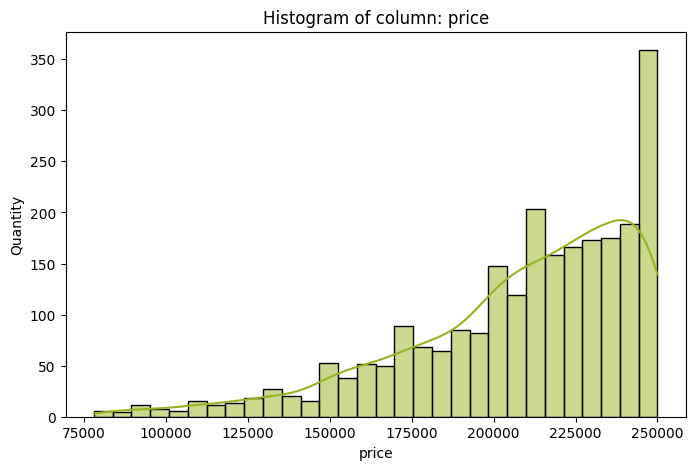

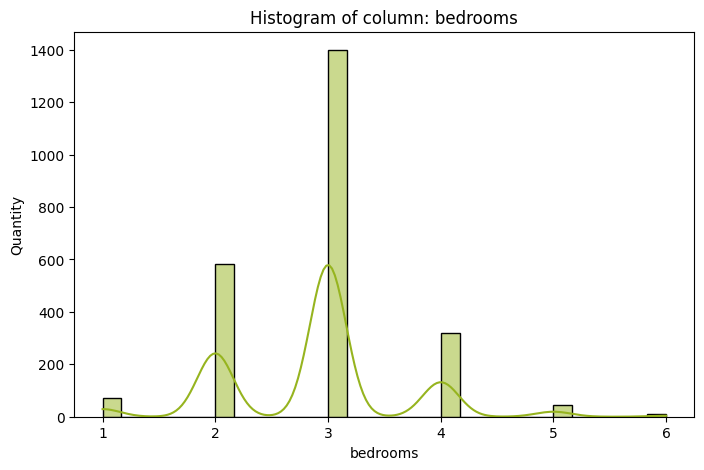

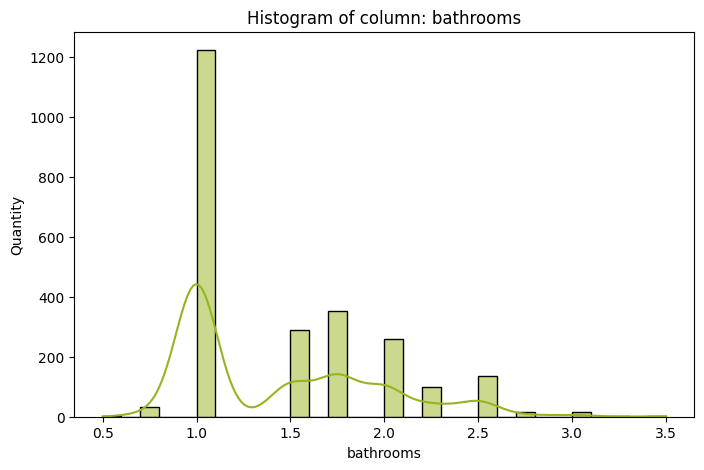

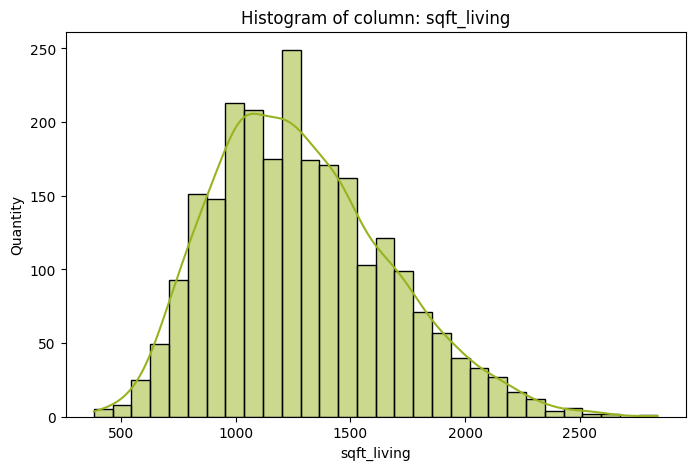

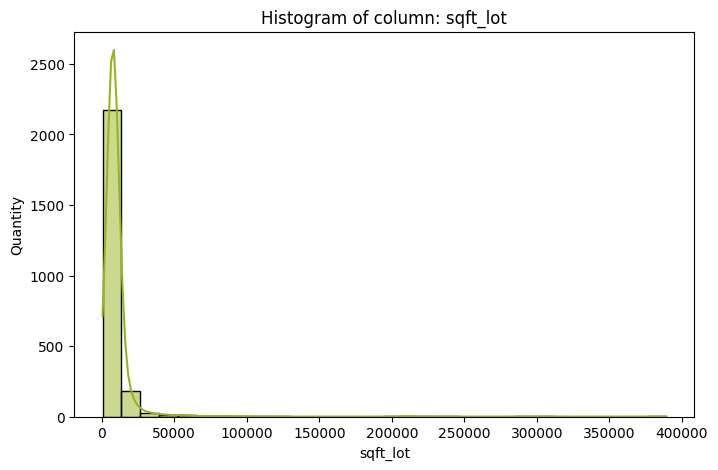

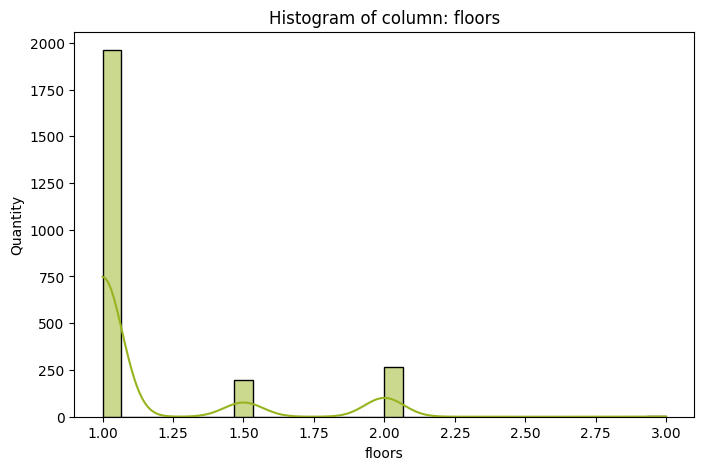

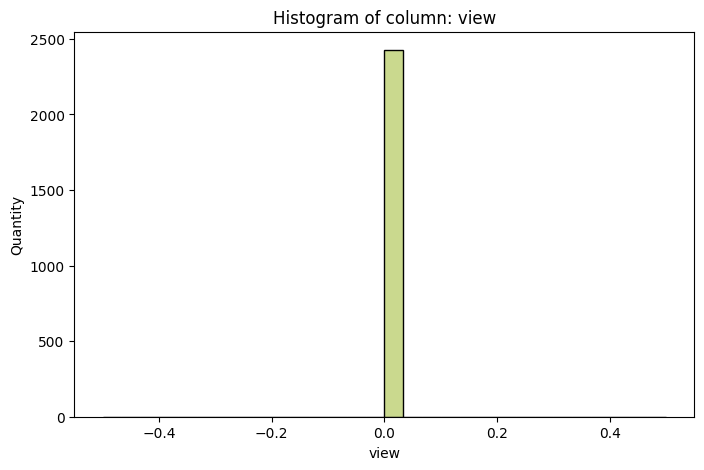

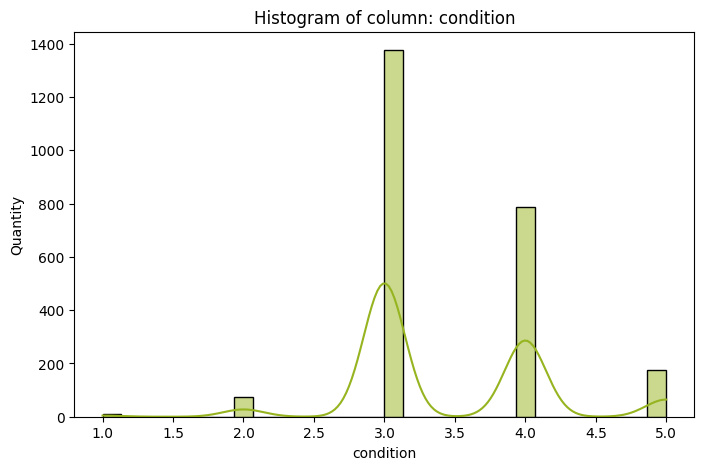

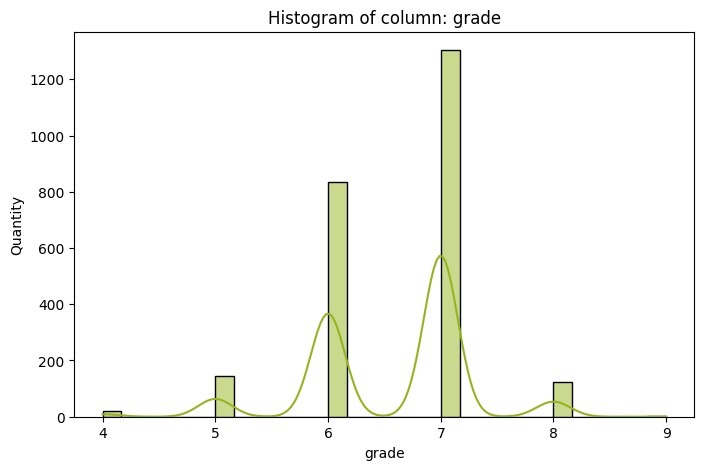

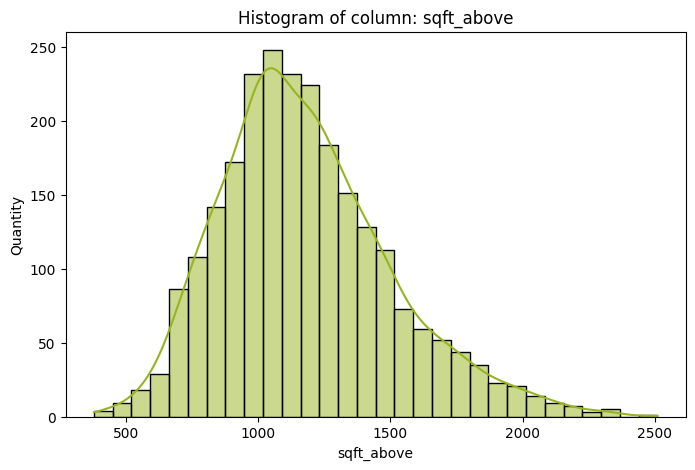

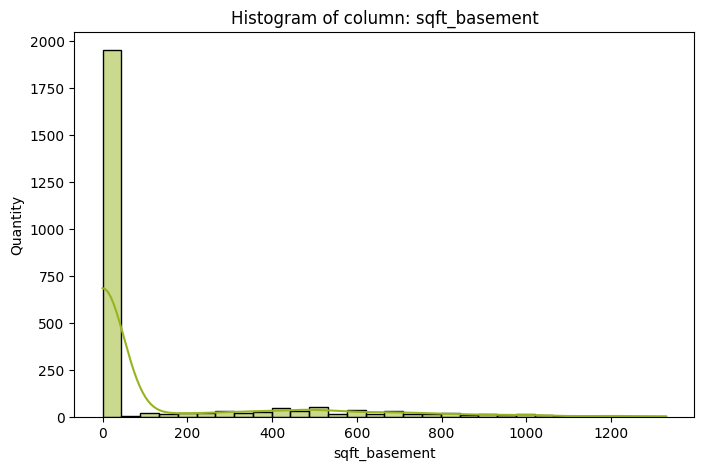

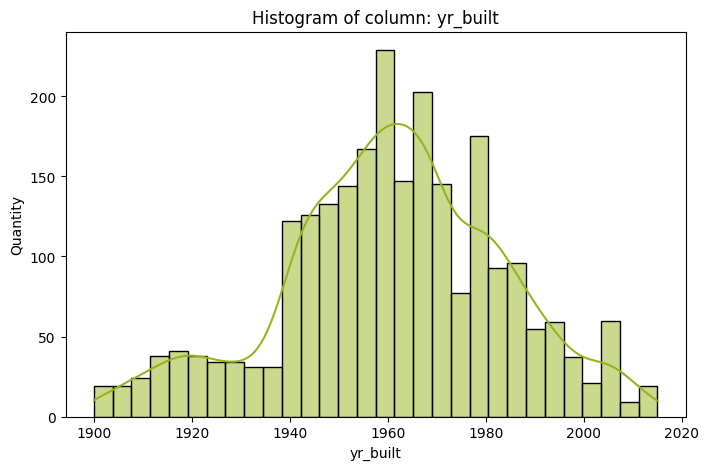

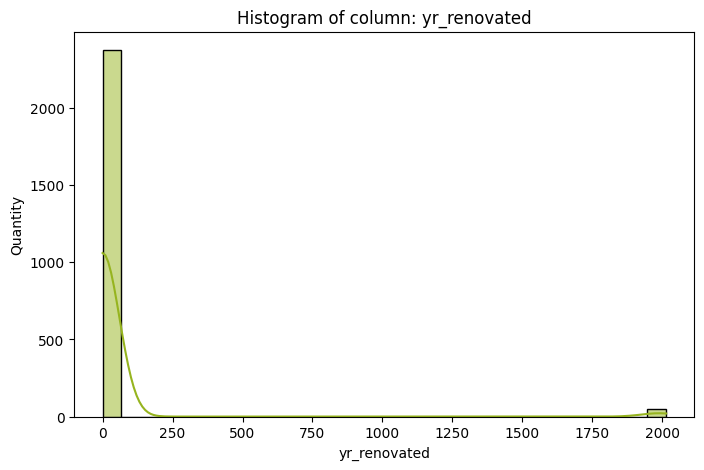

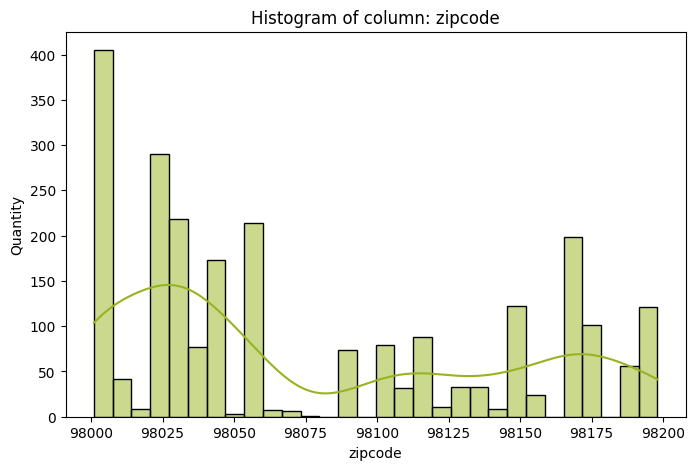

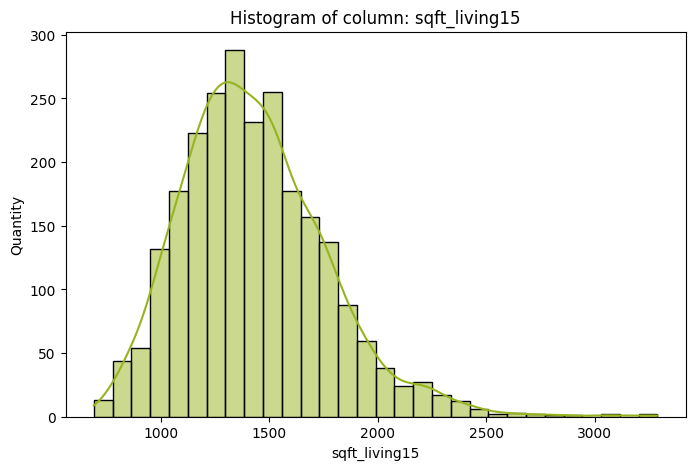

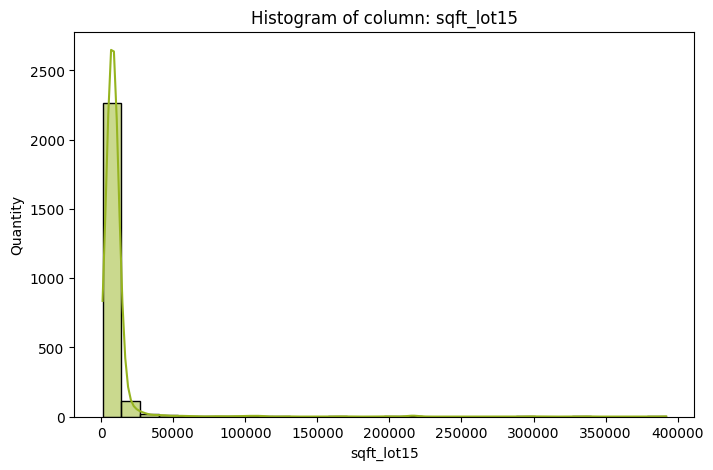

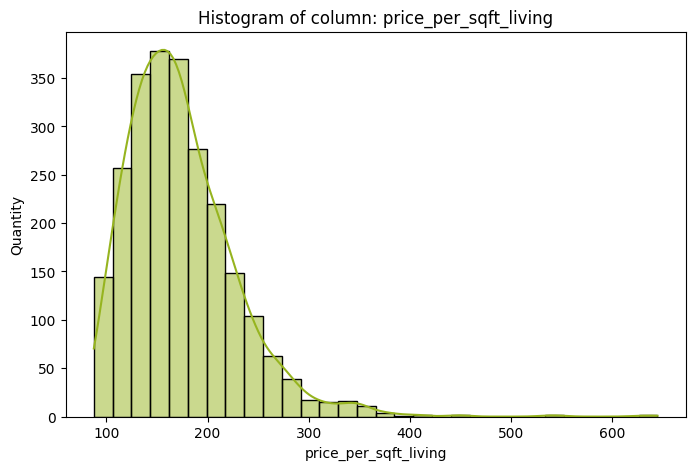

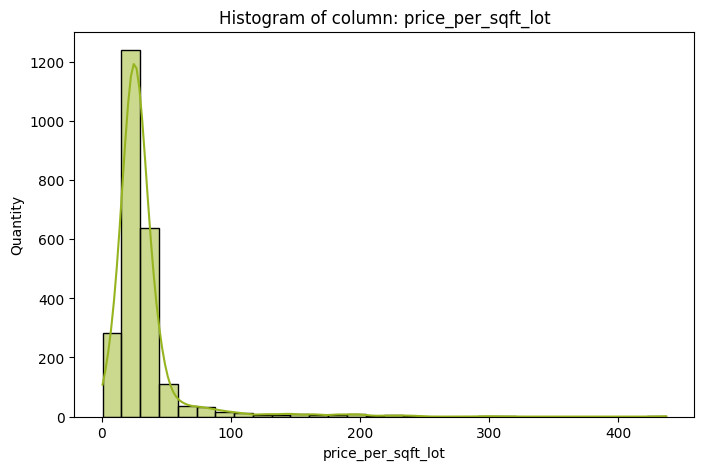

In [21]:
continuous_cols = [  #chose interesting variables
    'price',
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'sqft_lot',
    'floors',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'yr_renovated',
    'zipcode',
    'sqft_living15', 
    'sqft_lot15', 
    'price_per_sqft_living', 
    'price_per_sqft_lot'
]


# Go over columns
for col in continuous_cols:
    # new figure for each plot
    plt.figure(figsize=(8, 5))

    sns.histplot(data=poor_area_houses_df2, x=col, kde=True, bins=30, color="#96b41f")

    # set title
    plt.title(f'Histogram of column: {col}')
    plt.ticklabel_format(style='plain', axis='x') # get real values for x 
    plt.xlabel(col)
    plt.ylabel('Quantity')

    # show plots
    plt.show()

Dropping a single datapoint makes the lot values more readable. 
Here are some interesting findings from the data : 
- view is 0 for all poor houses. 
- most houses have a tiny lot, but a few ones have considerable plots
- 150 USD per sqft living is the most used value. 
- most houses have 1300 - 1400 sqft. 
- only very few houses are renovated
- most houses were built in the 1960s and have an even distribution between 1900 and 2016. 
- most houses have no basement
- most houses have grade 7 and condition 3. 
- most have 1 floor, 3 bedrooms and 1 bathroom. 
- there are much more houses for 250.000 USD than for one of the values below. Might be interesting to find a great one of those?



### Relationships in the data

- Compute the correlation matrix and plot it.
- Check the relationships between the values in your hypothesis and the targe (price)
- Are all the conclusions expected or unexpected?
- If helpful create new features by combining existing ones, e.g. if you have distance and time you could derive the speed.

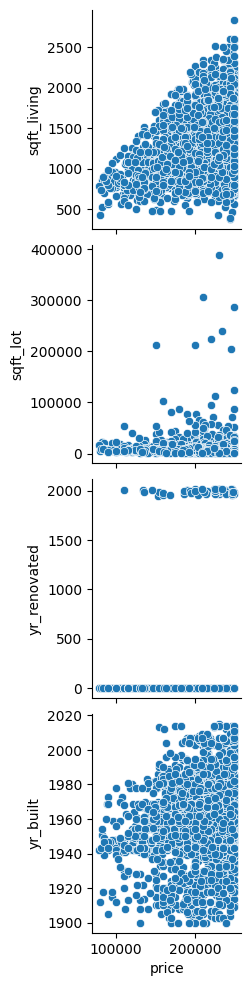

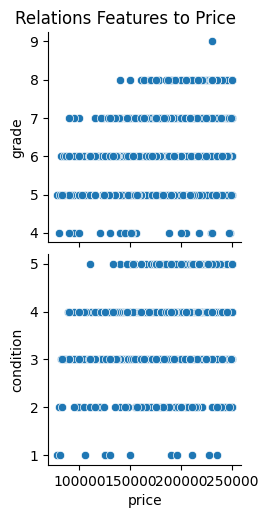

In [29]:
# Lets use a scatter plot to see relations between price and other variables. 
x1_col = ['price'] 
    
# Check on these variables
y1_cols = [
    'sqft_living',
    'sqft_lot',
    'yr_renovated',
    'yr_built'
]

# 2. Erstelle den PairPlot mit spezifischer Achsenzuweisung
sns.pairplot(
    data=poor_area_houses_df2,
    y_vars=y1_cols,  # Diese Spalten auf die y-Achse legen
    x_vars=x1_col,   # Diese Spalte auf die x-Achse legen
    kind='scatter'  # Stelle sicher, dass Scatter Plots verwendet werden (Standard)
)

# Lets use a scatter plot to see relations between price and other variables. 
x2_col = ['price'] 
    
# Check on these variables
y2_cols = [
    'grade',
    'condition'
]

# 2. Erstelle den PairPlot mit spezifischer Achsenzuweisung
sns.pairplot(
    data=poor_area_houses_df2,
    y_vars=y2_cols,  # Diese Spalten auf die y-Achse legen
    x_vars=x2_col,   # Diese Spalte auf die x-Achse legen
    kind='scatter'  # Stelle sicher, dass Scatter Plots verwendet werden (Standard)
)


plt.suptitle('Relations Features to Price', y=1.02)
plt.show()


That is cool. So lets have a look at findings : 
- condition does not say much about price, so better find a better condition
- the higher the grade, the higher the start price. 
- age: few very old houses in higher price range. But otherwise very scattered
- renovated does not say much about price, higher prices have more renovated houses. 
- higher price, higher lot size (but big outliers here)
- higher price, more sqft. But also more expensive houses with little sqfts. 

### 5.1 HYPOTHESIS 1 : 

The lowest-priced houses (bottom 10%) in the entire region are concentrated in only a few ZIP codes, indicating highly localized investment zones.

Key metrics : Distribution of Lowest Sale Prices by ZIP code, Cluster analysis of price data.


In [ ]:
# lets use plotly and seaborne for visualizations as another option
import plotly.express as px 


Lets see how the median of all house prices shows in the ZIP Codes

In [99]:
zip_group = df.groupby('zipcode')['price'].median().sort_values(ascending=True).reset_index()


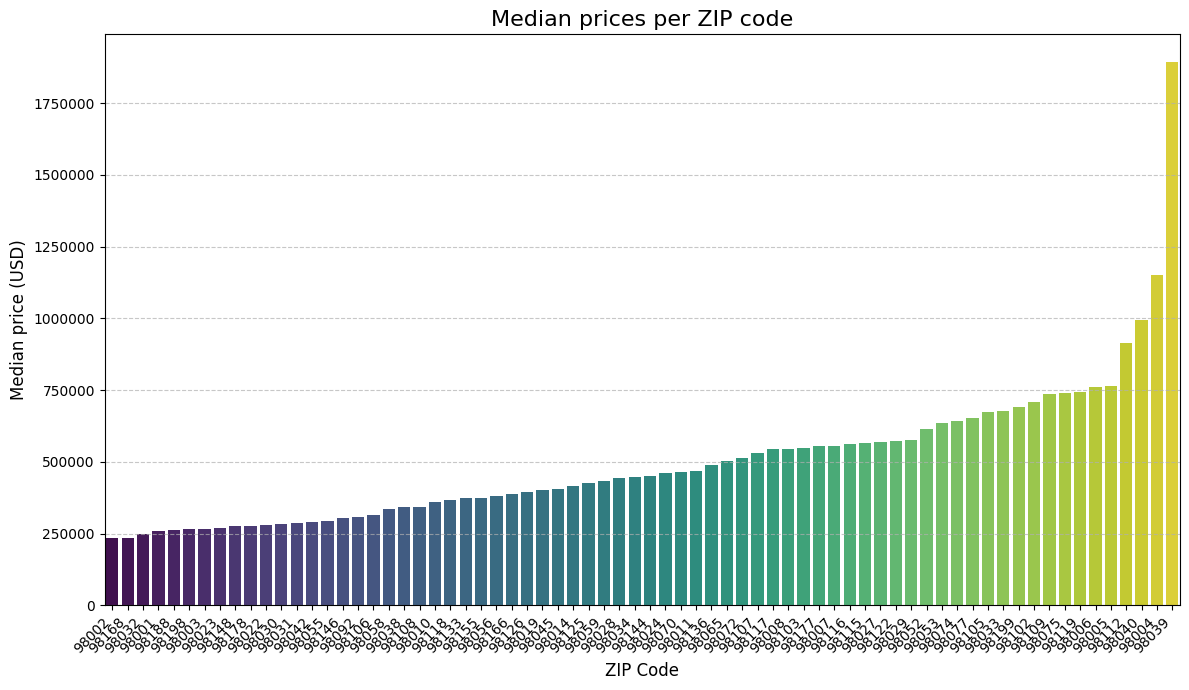

In [114]:
plt.figure(figsize=(12, 7))
sns.barplot(
    data=zip_group,
    x='zipcode',
    y='price',
    palette='viridis',  # nice colors
    order = zip_group.sort_values('price', ascending=True)['zipcode']
)
plt.title('Median prices per ZIP code', fontsize=16)
plt.xlabel('ZIP Code', fontsize=12)
plt.ylabel('Median price (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

This shows that ZIP codes with a mean that lies within the 10th percentile are very few. In fact, we have 3 very cheap ZIP codes out of 70 Zip codes in Kings County. 


In [ ]:
len(df.zipcode.unique()) # number of Zip codes in county


70

Look at all those 3 ZIP codes in Kings County to see where the cheapest houses are located.

In [39]:
# get plotly installed 
import plotly.express as px

In [ ]:
# 'Zipcode' must be string to get correct color
plotall_df = df.copy()
interesting_zip = [98002, 98168, 98032] # limit to ZIP codes with mean below 10th percentile
plotall_df = plotall_df[plotall_df['zipcode'].isin(interesting_zip)]
plotall_df['zipcode'] = plotall_df['zipcode'].astype(str)

In [57]:

# make interactive plot of map
fig = px.scatter_mapbox(
    plotall_df,
    lat="lat",            # (Latitude)
    lon="long",           #  (Longitude)
    color="zipcode",      # colour 'Zipcode'
    hover_data=["zipcode", 'price', 'yr_built'], # show house data when hovering over items
    zoom=10,              
    height=600,
    mapbox_style="open-street-map",  # use free map   carto-darkmatter
    title="ZIP codes with lowest mean for housing prices"
)

# Optional: Größe und Ränder anpassen
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})

# 5. Visualisierung anzeigen
fig.show()

Hypothesis 1 is proven : there are very few ZIP codes that have the lowest mean of housing prices. 

Now Erin wants to go for the lowest 5 ZIP codes, since only 3 limits her too much. So lets use the 5 lowest for the further evaluation. And lets show them in the map as well.. 


In [58]:
# 'Zipcode' must be string to get correct color
plotall_df = df.copy()
interesting_zip = [98002, 98168, 98032, 98001, 98188 ] # limit to ZIP codes to 5 with lowest mean value for price
plotall_df = plotall_df[plotall_df['zipcode'].isin(interesting_zip)]
plotall_df['zipcode'] = plotall_df['zipcode'].astype(str)

In [59]:
# make interactive plot of map
fig = px.scatter_mapbox(
    plotall_df,
    lat="lat",            # (Latitude)
    lon="long",           #  (Longitude)
    color="zipcode",      # colour 'Zipcode'
    hover_data=["zipcode", 'price', 'yr_built'], # show house data when hovering over items
    zoom=10,              
    height=600,
    mapbox_style="open-street-map",  # use free map   carto-darkmatter
    title="ZIP codes with lowest mean for housing prices"
)

# Optional: Größe und Ränder anpassen
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})

# 5. Visualisierung anzeigen
fig.show()

### 5.2 Hypothesis 2 : The Price-per-SqFt growth rate year-over-year in the target neighborhoods will exceed the city average Price-per-SqFt growth rate over the next 3 years based on the available history.

In [60]:
# lets have a look at the growth rates for all ZIP codes in Kings county for the years we have data for. 
df.date.min()

'2014-05-02'

In [61]:
df.date.max()

'2015-05-27'

We only have data for a full year. So we will go for quarterly price increments in the zip codes and use the mean value for those. 

In [68]:
# price increase from months 05-07 to 8-9-10, 11-12-01, 2-3-4-5
# get average prices over 3 month periods, grouped by zipcode
# overall_growth
df_1 = df.query("date <= '2014-08-02'").groupby('zipcode')['price'].mean()
df_2 = df.query("'2014-08-02' < date <= '2014-11-02'").groupby('zipcode')['price'].mean()
df_3 = df.query("'2014-11-02' < date <= '2015-02-02'").groupby('zipcode')['price'].mean()
df_4 = df.query("'2015-02-02' < date <= '2015-05-27'").groupby('zipcode')['price'].mean()

In [ ]:
avg_may_KC = df_1.mean() # average price overall in May-August Kings County

np.float64(560177.0101837959)

In [ ]:
# and a little more elegant... 
growth_df = df.copy()

 # Convert the 'date' column to datetime objects. Necessary when dataset was read from cleaned data!
growth_df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Ensure 'zipcode' is treated as a string for grouping
growth_df['zipcode'] = growth_df['zipcode'].astype(str)

# Use to_period('Q') for correct quarter grouping --> add quarter information
growth_df['Quarter'] = growth_df['date'].dt.to_period('Q')

# Convert to string for plotting purposes (e.g., '2014Q2')
growth_df['Time_Period'] =growth_df['Quarter'].astype(str)

# Aggregation: Mean Price per ZIP code and Time Period
quarterly_mean_price = growth_df.groupby(['zipcode', 'Time_Period'])['price'].mean().reset_index()
quarterly_mean_price.rename(columns={'price': 'Mean_Price'}, inplace=True)

# Calculate Overall Market Trend
# Aggregate by Time_Period across ALL ZIP codes
market_trend = growth_df.groupby('Time_Period')['price'].mean().reset_index()
market_trend.rename(columns={'price': 'Mean_Price'}, inplace=True)


# Add a unique identifier for the overall market line
market_trend['zipcode'] = 'OVERALL MARKET AVERAGE' 

# 5. Concatenate both DataFrames
df_final = pd.concat([quarterly_mean_price, market_trend], ignore_index=True)


,zipcode,Time_Period,Mean_Price
0,98001,2014Q2,255090.250
1,98001,2014Q3,286790.881
2,98001,2014Q4,276810.100
3,98001,2015Q1,276137.506
4,98001,2015Q2,328520.436
...,...,...,...
350,OVERALL MARKET AVERAGE,2014Q2,553337.125
351,OVERALL MARKET AVERAGE,2014Q3,537657.723
352,OVERALL MARKET AVERAGE,2014Q4,529852.653
353,OVERALL MARKET AVERAGE,2015Q1,528932.859


In [ ]:
interesting_zip_str = ['98002', '98168', '98032', '98001', '98188']
# Filter out the Overall Market line 
df_zips = df_final[df_final['zipcode'] != 'OVERALL MARKET AVERAGE'].copy()

# Prepare DataFrames for plotting
df_plot_zips = df_zips[df_zips['zipcode'].isin(interesting_zip_str)]  #interesting_zip contains 5 cheapest ZIP codes
df_market = df_final[df_final['zipcode'] == 'OVERALL MARKET AVERAGE']

# Now lets see the growth rates     
# 1. Get prices for the start and end period for the Top 5
start_prices = df_plot_zips[df_plot_zips['Time_Period'] == '2014Q2']
end_prices = df_plot_zips[df_plot_zips['Time_Period'] == '2015Q2']

# Merge to align start and end prices for growth calculation
growth_df = pd.merge(
    start_prices[['zipcode', 'Mean_Price']],
    end_prices[['zipcode', 'Mean_Price']],
    on='zipcode',
    suffixes=('_start', '_end')
)

# 2. Calculate the individual growth rate for each ZIP code
# Growth Rate = (End Price - Start Price) / Start Price
growth_df['Growth_Rate'] = (
    growth_df['Mean_Price_end'] - growth_df['Mean_Price_start']
) / growth_df['Mean_Price_start']

# get growth rate of whole market 
growth_market = float((df_market['Mean_Price'].loc[354] - df_market['Mean_Price'].loc[350])/df_market['Mean_Price'].loc[350])
print(f"The growth rate of the whole market in Kings County from May 2014 to May 2015 was {growth_market * 100} Percent")

The growth rate of the whole market in Kings County from May 2014 to May 2015 was 1.4411915417894532 Percent


In [127]:
growth_df['Growth_Rate']

0    0.288
1    0.032
2   -0.058
3    0.220
4    0.115
Name: Growth_Rate, dtype: float64

In [ ]:
# convert float values to percent. 
growth_prc_df = growth_df.copy()
growth_prc_df['Growth_Rate'] = growth_prc_df['Growth_Rate']*100
growth_prc_df

,zipcode,Mean_Price_start,Mean_Price_end,Growth_Rate
0,98001,255090.250,328520.436,28.786
1,98002,230637.594,238125.926,3.247
2,98032,272273.263,256533.333,-5.781
3,98168,216970.690,264798.636,22.044
4,98188,280897.273,313293.182,11.533


In [133]:
# show growth rate of those 5 ZIP codes over 1 year
fig = px.bar(
    growth_prc_df,
    x='zipcode',
    y='Growth_Rate',
    color='zipcode',
    title='Mean price development of cheapest 5 ZIPcodes over 4 quarters'
)

fig.show()

In [ ]:
# 1. Plot the 5 cheapest ZIP Codes
fig = px.line(
    df_plot_zips,
    x='Time_Period',
    y='Mean_Price',
    color='zipcode',
    title=f'Mean Price Development (cheapest 5 ZIPs) vs. Overall Market Trend. Market grew by {growth_market *100:.2f} percent'
)

# 2. Add the Overall Market Trend line (using add_trace)
# We use px.line() to generate the trace data structure and then add it.
fig.add_trace(
    px.line(df_market, x='Time_Period', y='Mean_Price').data[0]
)

# Update the appearance of the Market Trend line to make it stand out
fig.data[-1].line.color = 'black'  # A prominent, neutral color
fig.data[-1].line.width = 4        # Thicker line
fig.data[-1].name = 'OVERALL MARKET AVERAGE' # Correct name in the legend

# Axis Formatting
fig.update_yaxes(tickprefix="$", showgrid=True)
fig.update_xaxes(dtick=1) # Ensure every quarter is clearly displayed

fig.show()

  zipcode  Mean_Price  Growth_Rate
0   98001  255090.250        0.288
1   98001  286790.881        0.288
2   98001  276810.100        0.288
3   98001  276137.506        0.288
4   98001  328520.436        0.288


As we can see, all but one ZIPcode has better growth rates than the whole county.
We have two ZIP codes that stand out : 98001 and 98168. 
Even though the growth rate over one year was better for 98001, we had a decline here and only picked up a lot in the last Quarter. 
98168 did not show declines, so this might be the better ZIP code (less risk) to invest in. 
It is hard to predict for the next 3 years, but clearly it seems like the two ZIPcodes are interesting prospects. 

### 5.3 Hypothesis 3  : 
The average House SqFt in target neighborhoods is significantly smaller than the city average, suggesting the low price is partially driven by unit size, not just location risk.


In [134]:
# lets have a look at average SqFt in our neighborhoods compared to all of Kings County. 

df.sqft_living.mean()

np.float64(2080.3218502569803)

So we have a mean sqare footage of 2080 in all of Kings county. 
Lets compare that to our 5 ZIPcodes. 

In [135]:
interesting_zip = [98002, 98168, 98032, 98001, 98188 ] # limit to ZIP codes to 5 with lowest mean value for price
poor_areas_df = df[df['zipcode'].isin(interesting_zip)]

In [136]:
poor_areas_df.sqft_living.mean()

np.float64(1714.3853211009175)

So yes, we have an average sqare footage of 1714 compared to 2080 in the county. 
Lets plot that, looking at our Zip codes separately. 

In [155]:
size_houses_poor = poor_areas_df.groupby('zipcode').sqft_living.mean()
size_houses_poor_df = size_houses_poor.reset_index()
size_houses_poor_df

,zipcode,sqft_living
0,98001,1903.784
1,98002,1627.744
2,98032,1738.048
3,98168,1468.625
4,98188,1802.772


In [156]:
# lets use that dataframe and put the value for the market in there
new_row = pd.DataFrame({'zipcode': [99999], 'sqft_living': [2080.000]})

size_houses_poor_df = pd.concat([size_houses_poor_df, new_row], ignore_index=True)

# Convert zipcode to string for plotting purposes (e.g., '2014Q2')
size_houses_poor_df['zipcode'] =size_houses_poor_df['zipcode'].astype(str)
size_houses_poor_df


,zipcode,sqft_living
0,98001,1903.784
1,98002,1627.744
2,98032,1738.048
3,98168,1468.625
4,98188,1802.772
5,99999,2080.000


In [157]:
# show growth rate of those 5 ZIP codes over 1 year
fig = px.bar(
    size_houses_poor_df,
    x='zipcode',
    y='sqft_living',
    color='zipcode',
    title='Mean square footage in cheapest 5 ZIPcodes vs market (99999)'
)

fig.show()